In [1]:
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link

In [2]:
graph = CompleteGraph.of_sources("Passion_Xtreme_III.mat", "NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
graph.nodes

[Node(id='4e9fba57c1f94a669f414ee41fdb3e70', name='02-00001_AN_1', pos=(10.813682572466346, 33.57836559188485), node_degree=2, type='HL5', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['02-00001_AN_1 <-> 02-03095_AN_1', '02-00001_AN_1 <-> 02-03021_AN_1'], assoc_nodes=['02-03095_AN_1', '02-03021_AN_1']),
 Node(id='4e9fba57c1f94a669f414ee41fdb3e70', name='02-00002_AN_1', pos=(16.690265125037342, 17.614965513003913), node_degree=3, type='HL5', traffic_profile='high', estimated_traffic_injection=1000, assoc_links=['02-00002_AN_1 <-> 02-00051_AN_1', '02-00002_AN_1 <-> 02-02225_AN_1', '02-00002_AN_1 <-> 02-02416_AN_1'], assoc_nodes=['02-00051_AN_1', '02-02225_AN_1', '02-02416_AN_1']),
 Node(id='4e9fba57c1f94a669f414ee41fdb3e70', name='02-00006_AN_1', pos=(24.853239319625523, 14.363748941328023), node_degree=2, type='HL5', traffic_profile='medium', estimated_traffic_injection=500, assoc_links=['02-00006_AN_1 <-> 02-02210_AN_1', '02-00006_AN_1 <-> 02-03003_AN_1'], assoc_

In [4]:
graph.links

[Link(id='003ba264493044baa9c6190cd510c7c3', a=Node(id='4e9fba57c1f94a669f414ee41fdb3e70', name='02-00001_AN_1', pos=(10.813682572466346, 33.57836559188485), node_degree=2, type='HL5', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['02-00001_AN_1 <-> 02-03095_AN_1', '02-00001_AN_1 <-> 02-03021_AN_1'], assoc_nodes=['02-03095_AN_1', '02-03021_AN_1']), b=Node(id='4e9fba57c1f94a669f414ee41fdb3e70', name='02-03095_AN_1', pos=(10.434181316499831, 32.35684308043463), node_degree=2, type='HL5', traffic_profile='low', estimated_traffic_injection=250, assoc_links=['02-00001_AN_1 <-> 02-03095_AN_1', '02-03095_AN_1 <-> 02-02422_AN_1'], assoc_nodes=['02-00001_AN_1', '02-02422_AN_1']), distance_km=1.2, label='1.20km', name='02-00001_AN_1 <-> 02-03095_AN_1'),
 Link(id='003ba264493044baa9c6190cd510c7c3', a=Node(id='4e9fba57c1f94a669f414ee41fdb3e70', name='02-00001_AN_1', pos=(10.813682572466346, 33.57836559188485), node_degree=2, type='HL5', traffic_profile='low', estimated_traff

In [5]:
x, y = Node.obtain_x_y_vectors(graph.nodes)
names = Node.obtain_name_vector(graph.nodes)
degrees = Node.obtain_degree_vector(graph.nodes)
types = Node.obtain_type_vector(graph.nodes)

In [6]:
import json
with open('graph_dump.json' , 'w') as f:
    f.truncate(0)
    f.write(json.dumps(graph.model_dump(), indent=4))
    print("Graph dumped to graph_dump.json")

Graph dumped to graph_dump.json


# Plots

In [7]:
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot, RealMapNetworkPlot

/home/elig/Documents/GitHub/PoF_Simulator/model/NetworkGraphPlots.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([a[0], b[0]], [a[1], b[1]], edge_style, lw=edge_width, color=edge_color)
/home/elig/Documents/GitHub/PoF_Simulator/model/NetworkGraphPlots.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 4000x4000 with 2 Axes>, <Axes: title={'center': 'Grafo de Red'}>)

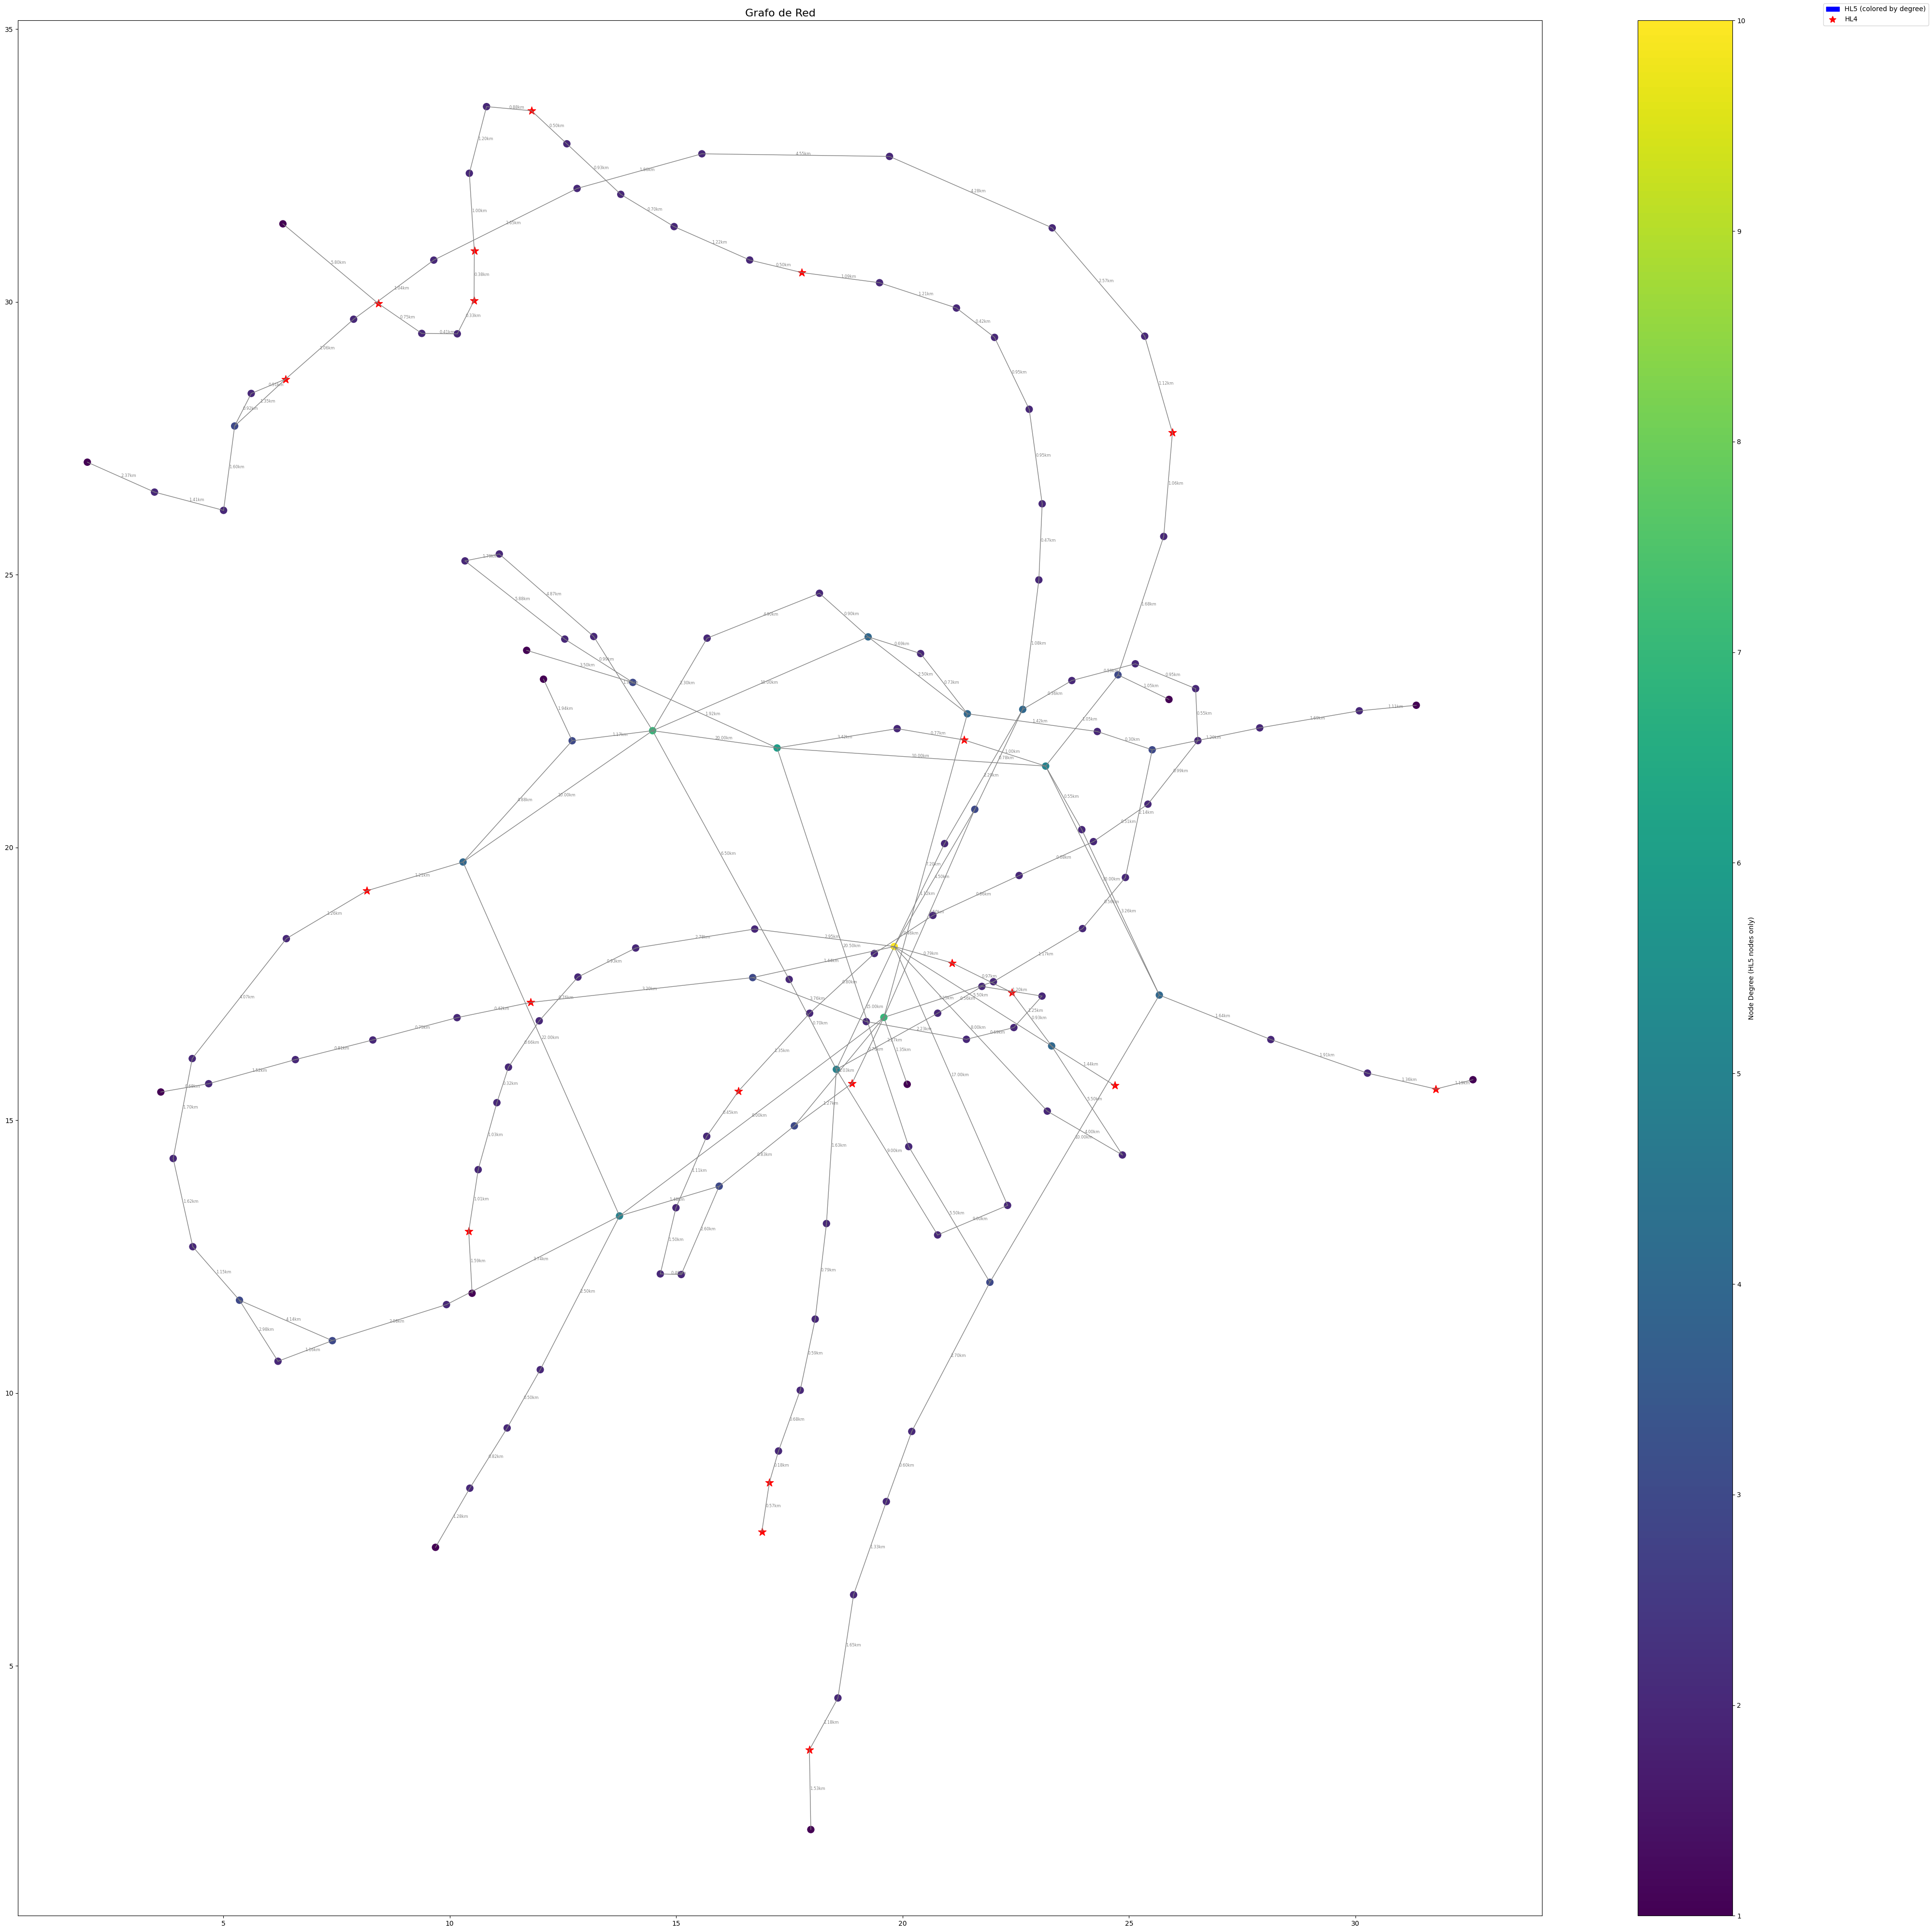

In [8]:
NodeDegreeHeatMapPlot.plot(graph)

# Test distances

In [9]:
import math

In [11]:

num_links_wrong = 0
for i, link in enumerate(graph.links):
    # print(link)
    print(f'Imported distance (km): {link.distance_km}')
    eu_distance = math.sqrt((link.a.pos[0] - link.b.pos[0])**2 + (link.a.pos[1] - link.b.pos[1])**2)
    print(f'Euclidean distance: {eu_distance}')
    print(f'Difference: {link.distance_km - eu_distance}')
    print('-'*100)
    if abs(link.distance_km - eu_distance) > 0.1 * link.distance_km:
        num_links_wrong += 1

print(f'Number of links with wrong distance: {num_links_wrong} ({len(graph.links)} total) ({num_links_wrong/len(graph.links)*100:.1f}%)')


Imported distance (km): 1.2
Euclidean distance: 1.279116276676913
Difference: -0.07911627667691312
----------------------------------------------------------------------------------------------------
Imported distance (km): 0.8809550931493786
Euclidean distance: 0.9959325315285896
Difference: -0.11497743837921104
----------------------------------------------------------------------------------------------------
Imported distance (km): 3.761828731593107
Euclidean distance: 2.633765269459738
Difference: 1.128063462133369
----------------------------------------------------------------------------------------------------
Imported distance (km): 1.4439893185041621
Euclidean distance: 3.176862416353423
Difference: -1.732873097849261
----------------------------------------------------------------------------------------------------
Imported distance (km): 3.2
Euclidean distance: 4.922476833818378
Difference: -1.7224768338183782
--------------------------------------------------------------